In [75]:
# Abdul Samad Zaheer Khan, ak9943@nyu.edu


# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
import os
from skimage.io import imread

# to store infected toe-nail images
infected_images = [] 
# fetching from the folder
for img in os.listdir('data/infected'):
    infected_images.append(imread('data/infected/' + img))

# to store healthy toe-nail images
benign_images = []
# fetching from the folder
for img in os.listdir('data/benign'):
   benign_images.append(imread('data/benign/' + img))
   
X = infected_images + benign_images   # storingg the data

# assigning labels to seperate images to classify infected and benign toe-nail images
y = [1]*len(infected_images) + [0]*len(benign_images) 


In [131]:
# preprocessing the images

from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
import os

# fucntion to pre process the images
# resizing the images to 64*64 dimensions otherwise every image should be trained individually
def preprocess_image(img_path):
    img = imread(img_path)

    # removing alpha channel if it exists
    if img.shape[-1] == 4:
        img = img[:, :, :3] 

    # resizing
    img_resized = resize(img, (64, 64), anti_aliasing=True)

    # converting the image to grayscale
    if len(img_resized.shape) == 3:
        img_resized = rgb2gray(img_resized)

    return img_resized

# preprocess infected toe-nail images
infected_images = [preprocess_image(os.path.join('data', 'infected', img)) for img in os.listdir(os.path.join('data', 'infected'))]

# preprocess healthy toe-nail images
benign_images = [preprocess_image(os.path.join('data', 'benign', img)) for img in os.listdir(os.path.join('data', 'benign'))]

# checking if all images have the same shape
image_shape = infected_images[0].shape 
infected_images = [img if img.shape == image_shape else resize(img, image_shape, anti_aliasing=True) for img in infected_images]
benign_images = [img if img.shape == image_shape else resize(img, image_shape, anti_aliasing=True) for img in benign_images]

# combinign the pre-processsed images
X = infected_images + benign_images

# converting to NumPY arrays
X = np.array(X)
y = np.array([1] * len(infected_images) + [0] * len(benign_images))


In [132]:
# printing the labels and the number of labels
print(y)
print("Total number of images are:", len(y))

print("\n")
# printing total number of infected and bening toe-nail images
print("Total number of infected toe-nail images are:", len(infected_images))
print("Total number of healthy toe-nail images are:", len(benign_images))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Total number of images are: 277


Total number of infected toe-nail images are: 191
Total number of healthy toe-nail images are: 86


In [133]:
# splitting the data into test train components

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [134]:
print(len(X_train))
print(len(y_train))
print(y_train)

221
221
[0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0
 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0
 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1]


In [135]:
# imprting the CNN model because we are using images

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [136]:
# adding features to the model architecture

# calculating the necessary arguments
img_height, img_width = X_train[0].shape[:2] 
input_shape = (64, 64, 1) 

# defining model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [137]:
# compiling the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [138]:
# model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 30752)             0         
                                                                 
 dense_8 (Dense)             (None, 64)                1968192   
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1968577 (7.51 MB)
Trainable params: 1968577 (7.51 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [156]:
# fitting the model on the traning dataset

# converting data from list datatype of Numpy array
X_train = np.array(X_train) 
y_train = np.array(y_train)

history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test))


Epoch 1/20
7/7 [==============================] - 0s 14ms/step - loss: 0.2360 - accuracy: 0.8507 - val_loss: 1.1918 - val_accuracy: 0.6607
Epoch 2/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2441 - accuracy: 0.8281 - val_loss: 1.2933 - val_accuracy: 0.6786
Epoch 3/20
7/7 [==============================] - 0s 12ms/step - loss: 0.2317 - accuracy: 0.8643 - val_loss: 1.2206 - val_accuracy: 0.6964
Epoch 4/20
7/7 [==============================] - 0s 12ms/step - loss: 0.2327 - accuracy: 0.8597 - val_loss: 1.2761 - val_accuracy: 0.6786
Epoch 5/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2307 - accuracy: 0.8643 - val_loss: 1.2507 - val_accuracy: 0.6964
Epoch 6/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2318 - accuracy: 0.8416 - val_loss: 1.2239 - val_accuracy: 0.6964
Epoch 7/20
7/7 [==============================] - 0s 12ms/step - loss: 0.2303 - accuracy: 0.8552 - val_loss: 1.2566 - val_accuracy: 0.6607
Epoch 8/20
7/7 [===========

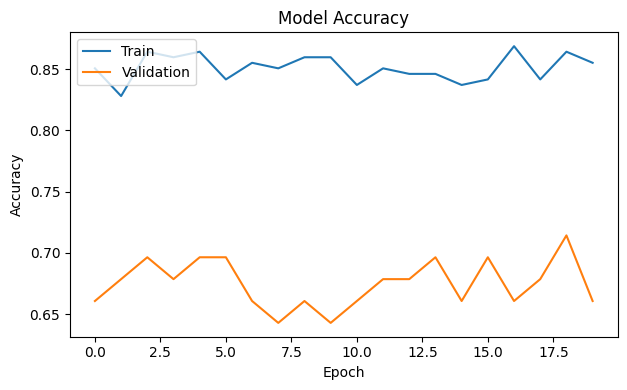

In [157]:
import matplotlib.pyplot as plt

# plotting model acccuracy

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.tight_layout()
plt.show()


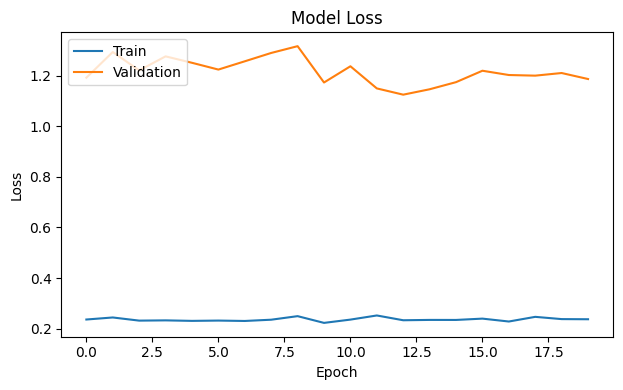

In [158]:
# plotting model loss

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [159]:
final_training_accuracy = history.history['accuracy'][-1]
print(f"Final Training Accuracy:", final_training_accuracy)

# Get the final validation accuracy
final_testing_accuracy = history.history['val_accuracy'][-1]
print("Final Testing Accuracy:", final_testing_accuracy)

Final Training Accuracy: 0.8552036285400391
Final Testing Accuracy: 0.6607142686843872


In [160]:
print("done")

done
